In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('data_assignment2.csv')

In [17]:
##First we look at the data to identify if there is a need for data cleaning.
data

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,0.0,44,4900000
3,4,175,7.0,728.0,0.0,14,6625000
4,5,118,6.0,1506.0,0.0,29,4600000
5,6,133,6.0,823.0,0.0,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,0.0,51,3000000


In [16]:
## We notice some NaN values, however, if we drop them immediatley, we risk loosing data which we can use.
## First we identify which variables we want to use to fit the regression, as price is not only dependent on the living area.
## Due to: 
data['Biarea'].min()
## We can also assume that NaN values represent plots where there is no additonal area and can thus replace NaN with 0.

0      25.0
1       6.0
2       0.0
3       0.0
4       0.0
5       0.0
6      70.0
7      49.0
8     102.0
9       0.0
10    112.0
11      0.0
12     30.0
13      8.0
14      0.0
15     13.0
16     20.0
17     21.0
18      0.0
19      0.0
20      0.0
21     50.0
22      7.0
23     84.0
24      0.0
25      8.0
26     31.0
27     43.0
28      0.0
29     70.0
30     10.0
31      0.0
32     60.0
33      0.0
34      0.0
35      0.0
36      0.0
37     50.0
38     30.0
39     22.0
40      0.0
41      0.0
42      0.0
43      8.0
44      0.0
45      7.0
46     69.0
47     20.0
48      0.0
49     25.0
50     23.0
51      0.0
52     30.0
53      0.0
54    118.0
55     30.0
Name: Biarea, dtype: float64

In [57]:
data['Biarea'] = data['Biarea'].fillna(0)
data['Biarea']

## Now we only have one entry with a NaN value, and assuming all relevant property has rooms we should drop this entry.
data =data.dropna()

## We can add landsize and Biarea togehter as they in the event of a sale essentially contribute equally to the selling-price.
data['Land_area_total'] = 0
data['Land_area_total'] = data['Land_size'] + data['Biarea']



,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price,Land_area_total
0,1,104,5.0,271.0,25.0,33,4600000,296.0
1,2,99,5.0,1506.0,6.0,88,4450000,1512.0
2,3,133,6.0,486.0,0.0,44,4900000,486.0
3,4,175,7.0,728.0,0.0,14,6625000,728.0
4,5,118,6.0,1506.0,0.0,29,4600000,1506.0
5,6,133,6.0,823.0,0.0,12,6650000,823.0
6,7,70,4.0,1685.0,70.0,53,2800000,1755.0
7,8,134,6.0,1593.0,49.0,57,6100000,1642.0
8,9,70,5.0,1120.0,102.0,81,3000000,1222.0
9,10,133,6.0,1503.0,0.0,51,3000000,1503.0


<AxesSubplot:xlabel='Living_area', ylabel='Selling_price'>

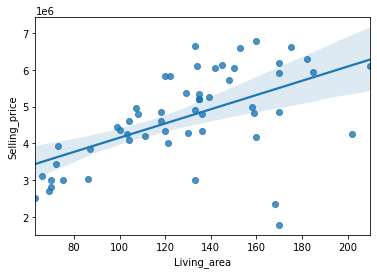

In [19]:
## Lets have a quick look at a quick regression plot
sns.regplot(data=data,x='Living_area',y='Selling_price')

In [65]:
## Running an initial OLS with on these we find:
import statsmodels.formula.api as sm


In [66]:
result = sm.ols(formula="Selling_price ~ Living_area", data=data).fit()

In [67]:
#result.params
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     30.66
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.08e-06
Time:                        11:20:54   Log-Likelihood:                -801.31
No. Observations:                  53   AIC:                             1607.
Df Residuals:                      51   BIC:                             1611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     2.22e+06    4.9e+05      4.532      

In [75]:
## We find significant coefficents (p<0.01, 
## Furhtermore, it seems to be a great explanatory variable as 
## it produced a high R-squared (ie. explaining a lot of the variation of sellingprice).
## Lets look at the coefcients:
print(result.params)
print(result.params[0])
print(result.params[1])
## The intercept:
## Living_area: Each additional area of living space contributes 20151 (SEK) to the sellingprice.

Intercept      2.219933e+06
Living_area    2.015128e+04
dtype: float64
2219933.4687544876
20151.279523921752


In [77]:
result2 = sm.ols(formula="Selling_price ~ Living_area + Land_area_total", data=data).fit()


In [80]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     15.58
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           5.50e-06
Time:                        11:26:41   Log-Likelihood:                -800.95
No. Observations:                  53   AIC:                             1608.
Df Residuals:                      50   BIC:                             1614.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.389e+06   5.32e+05     